# Statistical Analysis of Smoking and medical costs
* We are trying to establish statistical relation to medical cost for following attributes of our individual policy holders.
    1. Age
    2. Smoking
    3. Bmi
    4. Gender
    5. Children in the house hold
    6. Geography 
* This analysis could lead us to adjust premiums for health care policies to serve our shareholder and customers in a fair and data driven manner.

 

# Hypothesis
We have following specific hypothesis to test in this analysis.
    1. Are smokers claims higher than non smokers
    2. Is there statistical evidence for BMI between genders
    3. Is there correlation between smoking and customers region
    4. Is average BMI of Women differs by number of children
    
We will use exploratory data analysis (EDA) as well as statistical tests to test our hypothesis   

## Assumptions
1. We assume normal distribution for sample 
2. We assume all samples are idependent of each other and randomly drawn



In [464]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [465]:
# change your file location
file_name = "../../../data/csv/insurance.csv"

In [466]:
# read csv file into pandas data frame
df_insurance = pd.read_csv(file_name)

In [467]:
# check first few rows to make sure data is loaded correctly and what kind of columns we have 
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Sample size is large with categorical and numeric data

In [468]:
df_insurance["sex"]=df_insurance["sex"].astype("category")
df_insurance["smoker"]=df_insurance["smoker"].astype("category")
df_insurance["region"]=df_insurance["region"].astype("category")

In [469]:
df_insurance.describe(include=["category"]).T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [470]:
# get summary statistics min,max,q1,q2,q3, count etc
df_insurance.describe().T # this does not include categorical only continious numerical

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Correlation is positive but low no one is above 50

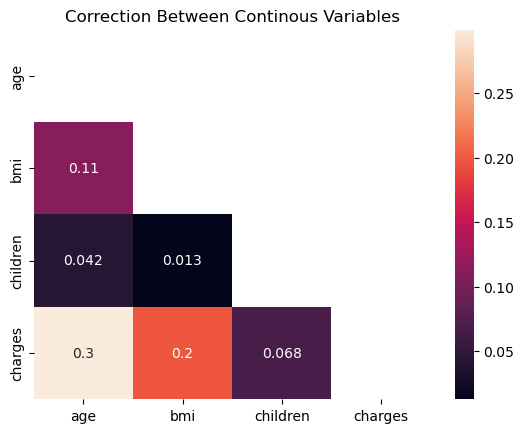

In [471]:

corr = df_insurance.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,annot=True,mask=mask) # mask upper triangle to reduce unnessary information
plt.title("Correction Between Continous Variables")
plt.show()

# Plot distribution for each continous variable

# Insight 
1. For Age, even though mode is 20, median age is around 40
2. Median BMI is around 30, which is border line obese acording to CDC
3. Median Children is 1, even though mode is zero. The distribution is left skewed.
4. Median charge is 10,000, but the distribution is left skewed, perhaps it is log normal. 
5. There are outlier charges and that could be due to adverse selection, meaning people who are very sick tend to have insurance


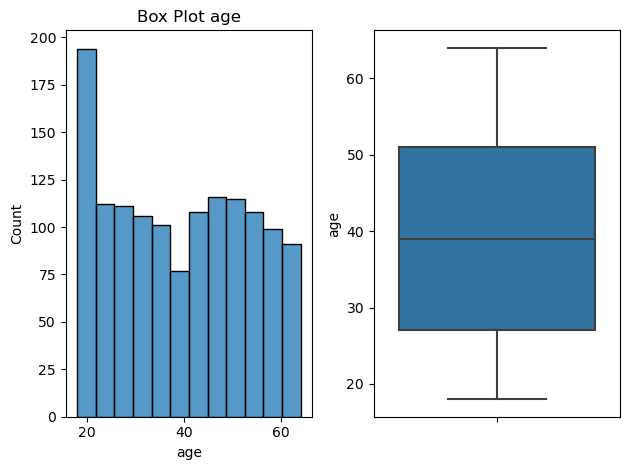

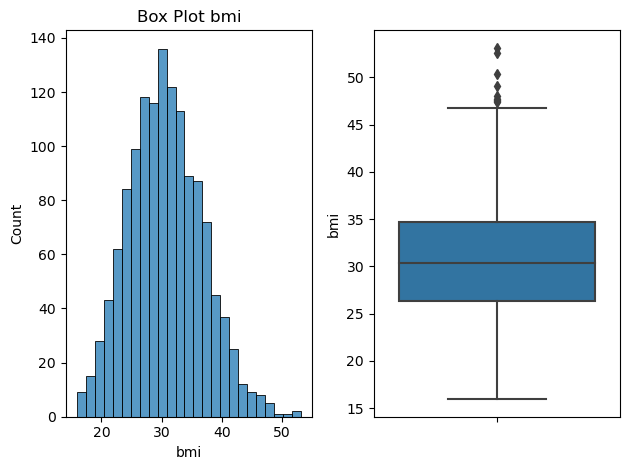

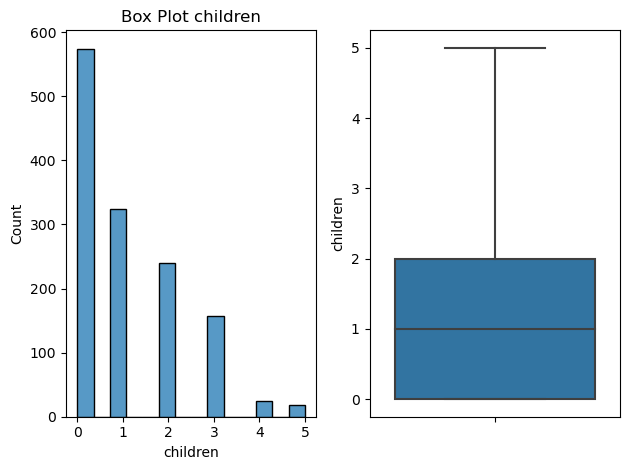

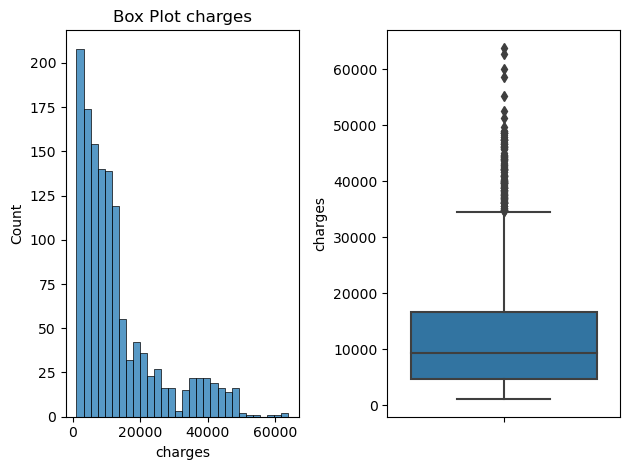

In [472]:
for col in df_insurance.select_dtypes(include="number").columns:
    fig,ax = plt.subplots(1,2)
    #percentage = df_insurance[col].mean()
    #print(percentage)
    plot = sns.histplot(data=df_insurance,x=col,ax=ax[0])
    ax[0].set_title("Histogram " + col)
    for i,p in enumerate(plot.patches):
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot # copying from solution provided
        y = p.get_y() + p.get_height() + 2           # hieght of the plot
        #formatted_percentage = "{:.2%}".format(percentage)
        #print(formatted_percentage)
    sns.boxplot(data=df_insurance,y=col,ax=ax[1])
    ax[0].set_title("Box Plot " + col)
    plt.tight_layout()

# Plot distribution for each category variable

# Insight 
1. Gender and Region counts is basically equal 
2. There are more non smokers than smokers

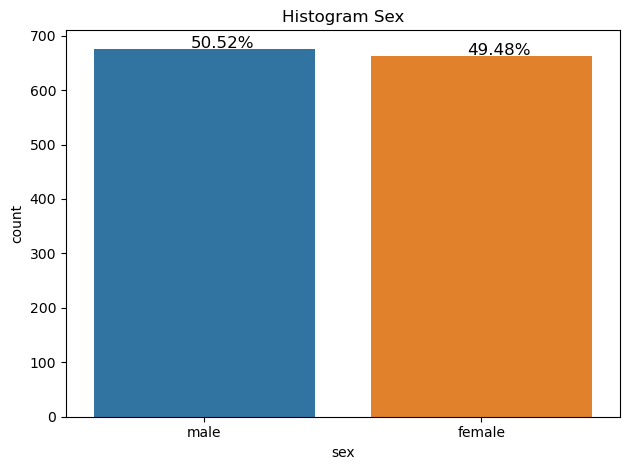

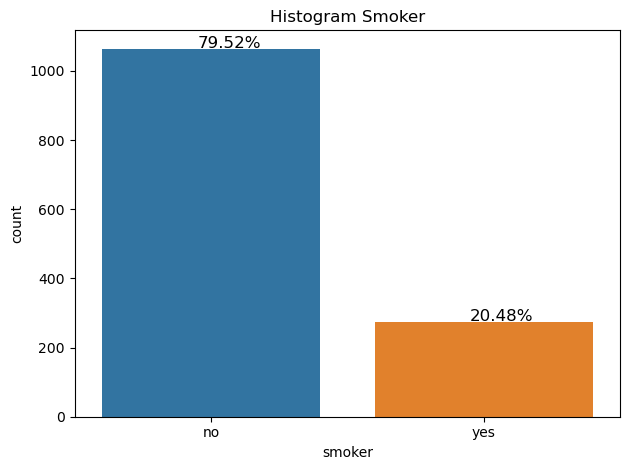

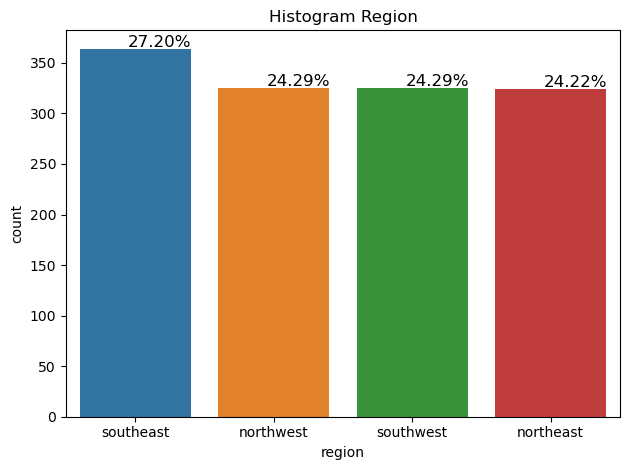

In [473]:
for col in df_insurance.select_dtypes(include="category").columns:
    #print(col)
    fig,ax = plt.subplots(1,1)
    percentage = df_insurance[col].value_counts() / df_insurance[col].count()
    #print(percentage)
    plot = sns.countplot(data=df_insurance,x=col,ax=ax,order=df_insurance[col].value_counts().index)
    ax.set_title("Histogram " + col.capitalize())
    for i,p in enumerate(plot.patches):
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot # copying from solution provided
        y = p.get_y() + p.get_height() + 2           # hieght of the plot
        formatted_percentage = "{:.2%}".format(percentage[i])
        #print(formatted_percentage)

        plot.annotate(formatted_percentage,(x,y),size=12)
    plt.tight_layout()

# comparing smokers vs non smoker densities
* Smokers and non smokers seems to have different distributions for charges
* Smokers have mean charges far higher than non smokers
* Smokers also have high variance, increasing risk of high charges
* Non Smokers have low variane and lower average charge

# Insight: Smokers have higher charges and have less predicability for under writing

Text(0.5, 1.0, 'Density Plot for Charges by smokers vs non smokers')

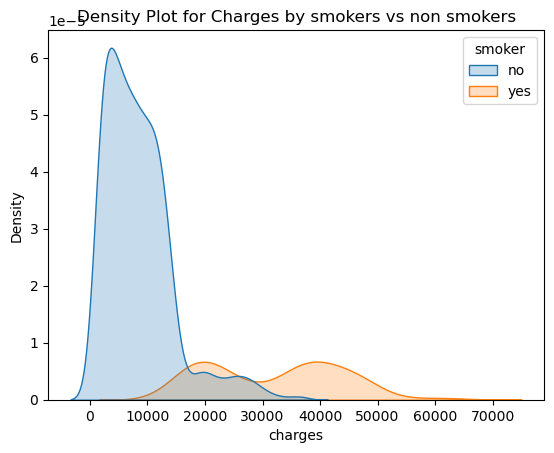

In [474]:
sns.kdeplot(data=df_insurance, x='charges', hue='smoker', fill=True)
plt.title('Density Plot for Charges by smokers vs non smokers')

# Smokers have a higher median charge compare to non smokers

Text(0.5, 1.0, 'Box Plot: Smoker vs. Charges')

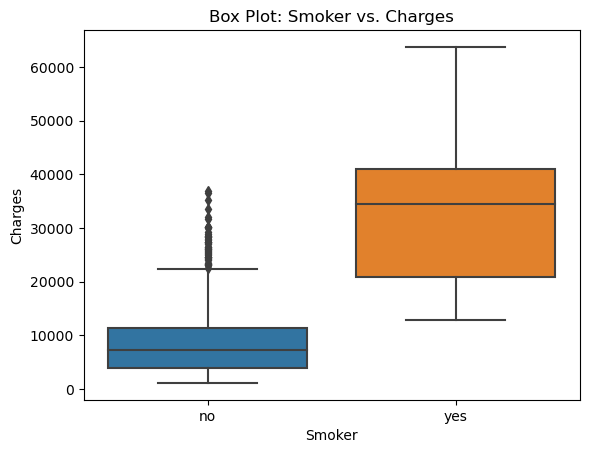

In [475]:
sns.boxplot(x='smoker', y='charges', data=df_insurance)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Box Plot: Smoker vs. Charges')

# Insight Smokers by Region
1. Smokers in South (East and West) have higher cost on an average, modes are on the right
2. All smokers have higher charges then non smokers, modes are on the right of Non Smokers

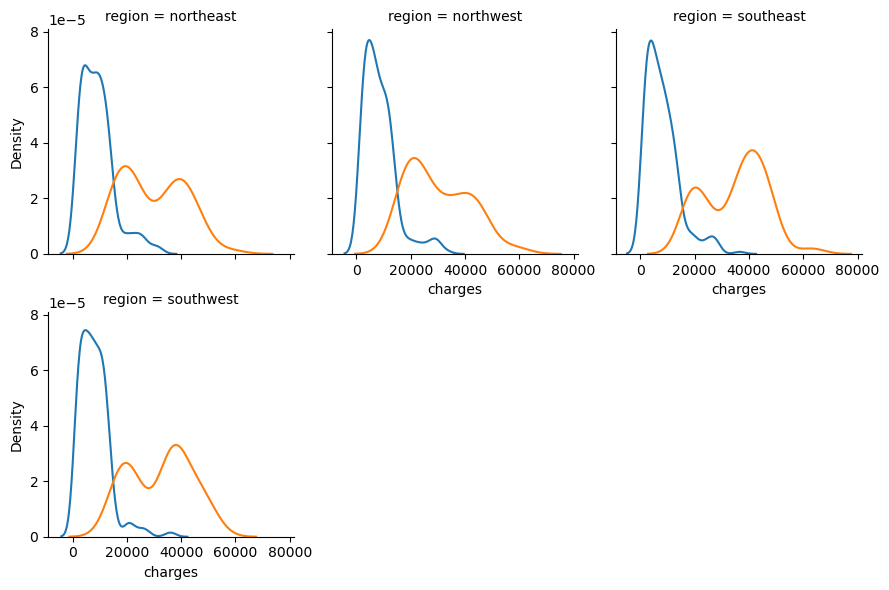

In [476]:
g = sns.FacetGrid(data=df_insurance, col="region",hue="smoker", col_wrap=3)
g.map(sns.kdeplot, "charges" )

# Insight BMI by Gender
1. Female Smokers seem to have lower BMI on average
2. Male Smokers and non smokers have the similar BMI average

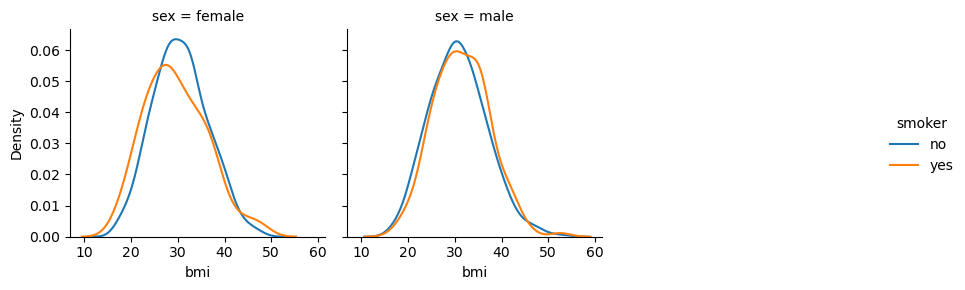

In [477]:
g = sns.FacetGrid(data=df_insurance, col="sex",hue="smoker", col_wrap=3)
g.map(sns.kdeplot, "bmi" )
g.add_legend()

# Insight BMI by Gender
1. Charges tend to go up as BMI increases for very high charges
2. For Lower range of the Charges there does not seem to be a upward trend

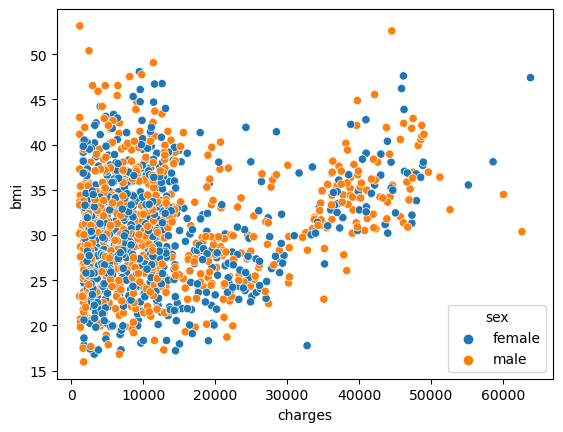

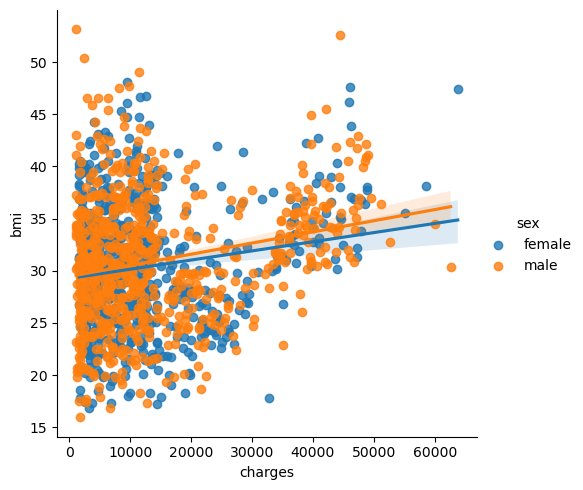

In [478]:
sns.scatterplot(data=df_insurance,x="charges",y="bmi",hue='sex')
sns.lmplot(data=df_insurance, x='charges', y='bmi', hue='sex')


# Insight BMI by Age
1. Charges tend to go up as Age increases for very high charges
2. The Charges seem to have a band by Age, for up to 15000, higher the age higher the charge

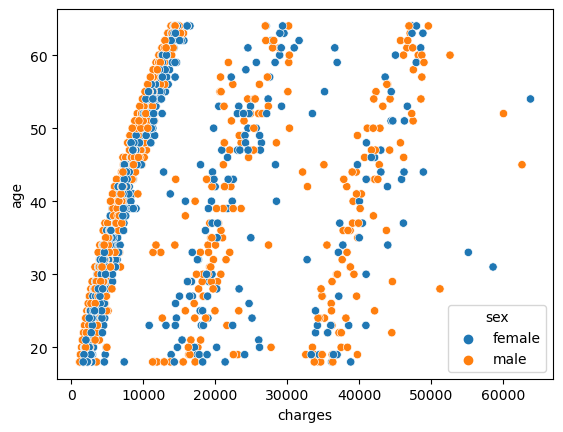

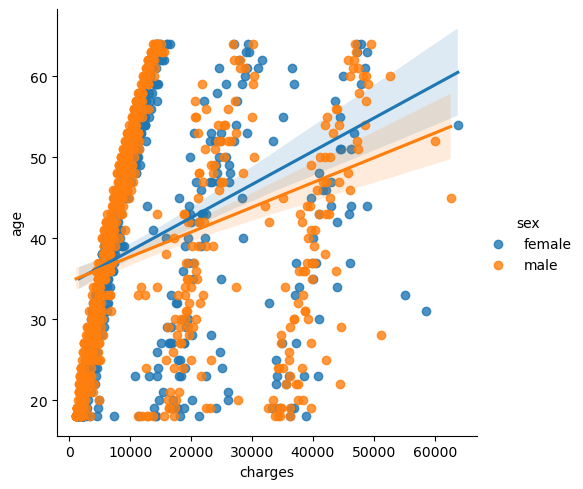

In [479]:
sns.scatterplot(data=df_insurance,x="charges",y="age",hue='sex')
sns.lmplot(data=df_insurance, x='charges', y='age', hue='sex')

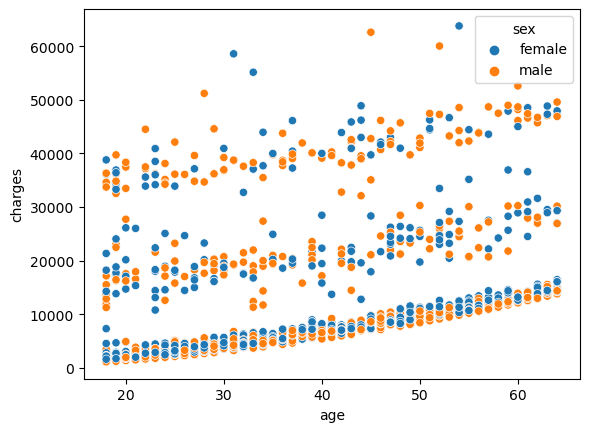

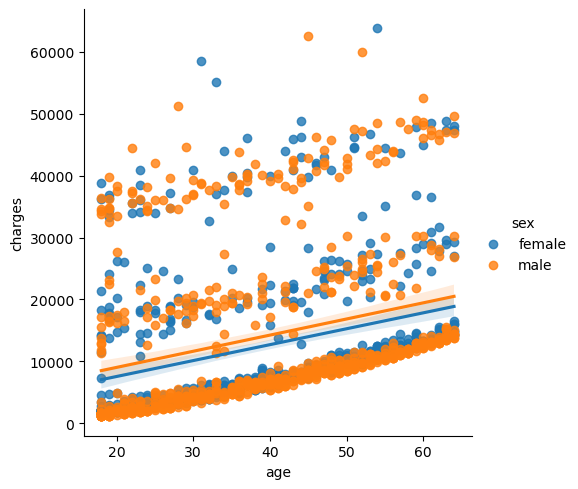

In [480]:
sns.scatterplot(data=df_insurance,x="age",y="charges",hue='sex')
sns.lmplot(data=df_insurance, x='age', y='charges', hue='sex')

In [481]:
alpha = 0.05 # default significance level

<h2>Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?</h2>

# Insight
1. Smokers for any age group tend to have Charges higher than non smokers as shown in the trend line

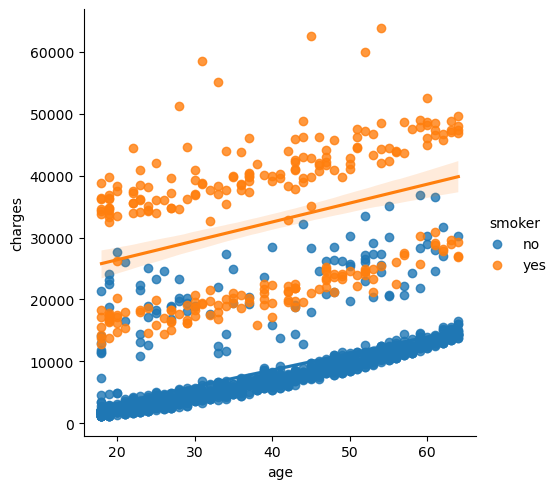

In [482]:
#sns.scatterplot(data=df_insurance,x="age",y="charges",hue='smoker')
sns.lmplot(data=df_insurance, x='age', y='charges', hue='smoker')

# T-Test for Smoker
* Ho = Mean charge for Smoker is less than or equal to Non smoker MuSmoker <= MuNonSmoker
* Ha = There is higher charge for Smokers than Non somker MuSmoker > MuNonSmoker

# Insight Smokers have higher charge than non smokers

In [483]:
print(f"Alpha {alpha}")
smokers =  df_insurance[df_insurance.smoker == "yes"].charges
non_smokers =  df_insurance[df_insurance.smoker == "no"].charges
tstat, pvalue = stats.ttest_ind(smokers,non_smokers,alternative="greater")
print(f"tstat {tstat:4.7f} pvalue {pvalue:4.7f}")
if pvalue < alpha:
    print("Reject Ho, meaning Ha is accepted, i.e. mean charge for smoker is greater than non smoker")
else:
    print("Accept Ho, meaning charge for smoker is less than equal non smoker")

Alpha 0.05
tstat 46.6649212 pvalue 0.0000000
Reject Ho, meaning Ha is accepted, i.e. mean charge for smoker is greater than non smoker


<h2>Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.</h2>

# T-Test for BMI and Gender
* Ho = Mean BMI for males and femals is same MuMale = MuFemale
* Ha = Mean BMI for males and femals is differnct MuMale != MuFemale

# Insight there is no statistical difference between male and female bmi

In [484]:
print(f"Alpha {alpha}")
males_bmi =  df_insurance[df_insurance.sex == "male"].bmi
females_bmi =  df_insurance[df_insurance.sex == "female"].bmi
tstat, pvalue = stats.ttest_ind(males_bmi,females_bmi,alternative="two-sided") # not equal means two sided
print(f"tstat {tstat:4.7f} pvalue {pvalue:4.7f}")
if pvalue < alpha:
    print("Reject Ho, meaning Ha is accepted, i.e. BMI for male and female is different")
else:
    print("Accept Ho, BMI for male and female is same")

Alpha 0.05
tstat 1.6967526 pvalue 0.0899764
Accept Ho, BMI for male and female is same


# Is Proportions of smokers significantly different across diffrent regions?
* Ho : Region has no effect on Smoking
* Ha : Region has effect on Smoking

In [485]:
print(f"Alpha {alpha}")
crosstab_region_smoker =  pd.crosstab(df_insurance["region"],df_insurance["smoker"])
chi_stat, pvalue, df,ex = stats.chi2_contingency(crosstab_region_smoker)

print(f"chi_stat {chi_stat:4.7f} pvalue {pvalue:4.7f}")
if pvalue < alpha:
    print("Reject Ho, meaning Ha is accepted, i.e. Region has effect on smoking")
else:
    print("Accept Ho, Region has no effect on smoking")

Alpha 0.05
chi_stat 7.3434778 pvalue 0.0617195
Accept Ho, Region has no effect on smoking


<h2>Is the mean BMI of women with no children, one child, and two children the same?</h2>

# Insight the mean BMI for females for 0,1,2 children is about the same i.e ~30

In [486]:
df_insurance.groupby(['sex','children'])['bmi'].mean()

sex     children
female  0           30.361522
        1           30.052658
        2           30.649790
        3           30.436429
        4           31.943182
        5           30.620625
male    0           30.741719
        1           31.166145
        2           31.300992
        3           30.922937
        4           30.957500
        5           28.792500
Name: bmi, dtype: float64

# ANOVA to test statistical significance between levels (children = 0,1,2) in the same group (female)
1. Ho = No diffrence of BMI for children = 0,1,2
2. Ha = There is difference of BMI for Children = 0,1,2

#Insight there is no diffrence in BMI for females with 0,1,2 children

In [487]:
print(f"Alpha {alpha}")
df_female = df_insurance[df_insurance.sex == "female"]
df_bmi_no_child = df_female[df_female.children == 0]["bmi"]
df_bmi_one_child = df_female[df_female.children == 1]["bmi"]
df_bmi_two_children = df_female[df_female.children == 2]["bmi"]
fstat, pvalue = stats.f_oneway(df_bmi_no_child,df_bmi_one_child,df_bmi_two_children)

print(f"ANOVA fstat {fstat:4.7f} pvalue {pvalue:4.7f}")
if pvalue < alpha:
    print("Reject Ho, meaning Ha is accepted, i.e. there is difference of BMI for children = 0,1,2")
else:
    print("Accept Ho, meaning there is no difference of BMI for children = 0,1,2")


Alpha 0.05
ANOVA fstat 0.3344720 pvalue 0.7158580
Accept Ho, meaning there is no difference of BMI for children = 0,1,2


# Conclusions

In [ ]:
## Smokers
* Smokers have higher claims than non smokers, we need to consider smoking habbit as part of underwriting policies

## Age
* Charges are proportional to age, higher the age higher the charges

## BMI
* There is no difference in BMI for females and number of children
* Most of the policy holders have higher than CDC recommed BMI, and there are slightly higher charges for higher BMI 